In [26]:
import pandas as pd
import numpy as np
import re
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df1 = pd.read_csv("data/raw/goodreads.csv")
df1

,Shelf,Title,Author,Rating,Publication Year,Link
0,children,Charlotte’s Web,E.B. White,4.21,1952.0,https://www.goodreads.com/book/show/24178.Char...
1,children,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.47,1997.0,https://www.goodreads.com/book/show/42844155-h...
2,children,The Little Prince,Antoine de Saint-Exupéry,4.33,1943.0,https://www.goodreads.com/book/show/157993.The...
3,children,The Giving Tree,Shel Silverstein,4.38,1964.0,https://www.goodreads.com/book/show/370493.The...
4,children,Where the Wild Things Are,Maurice Sendak,4.25,1963.0,https://www.goodreads.com/book/show/19543.Wher...
...,...,...,...,...,...,...
732,philosophy,Groundwork of the Metaphysics of Morals,Immanuel Kant,3.83,1785.0,https://www.goodreads.com/book/show/60080.Grou...
733,philosophy,Phenomenology of Spirit,Georg Wilhelm Friedrich Hegel,3.96,1807.0,https://www.goodreads.com/book/show/9454.Pheno...
734,philosophy,Discourse on Method and Meditations on First P...,René Descartes,3.77,1637.0,https://www.goodreads.com/book/show/31862.Disc...
735,philosophy,The Plague,Albert Camus,4.02,1947.0,https://www.goodreads.com/book/show/11989.The_...


In [28]:
df1 = df1.rename(columns={
    "Shelf": "Genre",
    "Rating": "Average Rating"
})

In [29]:
df2 = pd.read_csv("data/raw/openlibrary.csv")
df2

,Genre,Title,Author,Average Rating,Ratings Count,Publication Year,Link
0,fantasy,Lilith,George MacDonald,3.20,5.0,1895.0,https://openlibrary.org/works/OL15437W
1,fantasy,The Sea Fairies,L. Frank Baum,3.33,3.0,1911.0,https://openlibrary.org/works/OL262384W
2,fantasy,The Phoenix and the Carpet,Edith Nesbit,3.10,10.0,1903.0,https://openlibrary.org/works/OL99539W
3,fantasy,The Enchanted Castle,Edith Nesbit,4.18,11.0,1907.0,https://openlibrary.org/works/OL99541W
4,fantasy,Phantastes,George MacDonald,3.83,12.0,1850.0,https://openlibrary.org/works/OL15450W
...,...,...,...,...,...,...,...
652,memoir,Manon Lescaut,"Abbé Prévost, F. C. Green, felix crespo, Pr&ea...",4.00,4.0,1734.0,https://openlibrary.org/works/OL1132652W
653,memoir,The Song of Hiawatha and Other Poems,Henry Wadsworth Longfellow,3.80,5.0,1800.0,https://openlibrary.org/works/OL495934W
654,memoir,Crying in H Mart,Michelle Zauner,3.82,22.0,2021.0,https://openlibrary.org/works/OL22448002W
655,memoir,Finding Me,Viola Davis,3.78,9.0,2022.0,https://openlibrary.org/works/OL25988701W


In [30]:
df2.drop("Ratings Count", axis=1, inplace=True)

In [31]:
df2

,Genre,Title,Author,Average Rating,Publication Year,Link
0,fantasy,Lilith,George MacDonald,3.20,1895.0,https://openlibrary.org/works/OL15437W
1,fantasy,The Sea Fairies,L. Frank Baum,3.33,1911.0,https://openlibrary.org/works/OL262384W
2,fantasy,The Phoenix and the Carpet,Edith Nesbit,3.10,1903.0,https://openlibrary.org/works/OL99539W
3,fantasy,The Enchanted Castle,Edith Nesbit,4.18,1907.0,https://openlibrary.org/works/OL99541W
4,fantasy,Phantastes,George MacDonald,3.83,1850.0,https://openlibrary.org/works/OL15450W
...,...,...,...,...,...,...
652,memoir,Manon Lescaut,"Abbé Prévost, F. C. Green, felix crespo, Pr&ea...",4.00,1734.0,https://openlibrary.org/works/OL1132652W
653,memoir,The Song of Hiawatha and Other Poems,Henry Wadsworth Longfellow,3.80,1800.0,https://openlibrary.org/works/OL495934W
654,memoir,Crying in H Mart,Michelle Zauner,3.82,2021.0,https://openlibrary.org/works/OL22448002W
655,memoir,Finding Me,Viola Davis,3.78,2022.0,https://openlibrary.org/works/OL25988701W


In [32]:
#merging the csvs
df = pd.concat([df1, df2], ignore_index=True)
df

,Genre,Title,Author,Average Rating,Publication Year,Link
0,children,Charlotte’s Web,E.B. White,4.21,1952.0,https://www.goodreads.com/book/show/24178.Char...
1,children,Harry Potter and the Philosopher’s Stone (Harr...,J.K. Rowling,4.47,1997.0,https://www.goodreads.com/book/show/42844155-h...
2,children,The Little Prince,Antoine de Saint-Exupéry,4.33,1943.0,https://www.goodreads.com/book/show/157993.The...
3,children,The Giving Tree,Shel Silverstein,4.38,1964.0,https://www.goodreads.com/book/show/370493.The...
4,children,Where the Wild Things Are,Maurice Sendak,4.25,1963.0,https://www.goodreads.com/book/show/19543.Wher...
...,...,...,...,...,...,...
1389,memoir,Manon Lescaut,"Abbé Prévost, F. C. Green, felix crespo, Pr&ea...",4.00,1734.0,https://openlibrary.org/works/OL1132652W
1390,memoir,The Song of Hiawatha and Other Poems,Henry Wadsworth Longfellow,3.80,1800.0,https://openlibrary.org/works/OL495934W
1391,memoir,Crying in H Mart,Michelle Zauner,3.82,2021.0,https://openlibrary.org/works/OL22448002W
1392,memoir,Finding Me,Viola Davis,3.78,2022.0,https://openlibrary.org/works/OL25988701W


In [33]:
df.columns = df.columns.str.lower()

In [34]:
def title(title):
    if pd.isna(title):
        return ""
    # Normalize unicode (fix 'Ã', smart quotes, etc.)
    title = unicodedata.normalize("NFKD", title).encode("ascii", "ignore").decode("utf-8")
    # Lowercase
    title = title.lower()
    # Remove punctuation and extra symbols
    title = re.sub(r"[^a-z0-9\s]", "", title)
    # Remove multiple spaces
    title = re.sub(r"\s+", " ", title).strip()
    return title

In [35]:
df["title"] = df["title"].apply(title)

In [36]:
#checking for duplicates
df['title'].value_counts()[df['title'].value_counts() > 1]

title
                             11
poems                         6
l humour                      3
carnet de notes               3
humour                        3
                             ..
the prince                    2
james and the giant peach     2
paradise lost                 2
on liberty                    2
tao te ching                  2
Name: count, Length: 75, dtype: int64

In [37]:
df = df.drop_duplicates(subset='title', keep='first').reset_index(drop=True)

In [38]:
df.duplicated().sum()

0

In [39]:
#checking for null
df.isnull().sum()

genre                0
title                0
author               2
average rating      55
publication year    37
link                 0
dtype: int64

In [40]:
df.dropna(inplace = True)

In [41]:
df.shape

(1227, 6)

In [42]:
df = df.rename(columns={"publication year": "publication_year",
                       "average rating": "average_rating"})

In [43]:
df["publication_year"] = df["publication_year"].astype(int)

In [44]:
df["average_rating"] = df["average_rating"].clip(0, 5)

In [45]:
df

,genre,title,author,average_rating,publication_year,link
0,children,charlottes web,E.B. White,4.21,1952,https://www.goodreads.com/book/show/24178.Char...
1,children,harry potter and the philosophers stone harry ...,J.K. Rowling,4.47,1997,https://www.goodreads.com/book/show/42844155-h...
2,children,the little prince,Antoine de Saint-Exupéry,4.33,1943,https://www.goodreads.com/book/show/157993.The...
3,children,the giving tree,Shel Silverstein,4.38,1964,https://www.goodreads.com/book/show/370493.The...
4,children,where the wild things are,Maurice Sendak,4.25,1963,https://www.goodreads.com/book/show/19543.Wher...
...,...,...,...,...,...,...
1297,memoir,unfinished,Priyanka Chopra Jonas,4.00,2021,https://openlibrary.org/works/OL24206176W
1298,memoir,stone butch blues,Leslie Feinberg,4.61,1993,https://openlibrary.org/works/OL1868110W
1300,memoir,manon lescaut,"Abbé Prévost, F. C. Green, felix crespo, Pr&ea...",4.00,1734,https://openlibrary.org/works/OL1132652W
1301,memoir,the song of hiawatha and other poems,Henry Wadsworth Longfellow,3.80,1800,https://openlibrary.org/works/OL495934W


In [46]:
df.to_csv("data/clean/cleaned_data.csv", index=False)

In [47]:
df["genre"].unique()

array(['children', 'fantasy', 'romance', 'fiction', 'non-fiction',
       'history', 'biography', 'science', 'humour', 'memoir', 'classics',
       'mystery', 'thriller', 'young-adult', 'contemporary', 'self-help',
       'graphic-novels', 'poetry', 'crime', 'philosophy'], dtype=object)

In [48]:
#import re

#def clean_title(title):
#    title = title.lower().strip()
#    title = re.sub(r'[^a-z\s]', '', title)
#    title = re.sub(r'\s+', ' ', title)
#    return title


In [49]:
#df['clean_title'] = df['title'].apply(clean_title)

In [50]:
#from rapidfuzz import fuzz

#potential_dupes = []

#for i in range(len(df)):
#    for j in range(i + 1, len(df)):
#        score = fuzz.ratio(df.iloc[i]['clean_title'], df.iloc[j]['clean_title'])
        
        # Similar title check
 #       if score > 90:
#            same_author = df.iloc[i]['author'].strip().lower() == df.iloc[j]['author'].strip().lower()
            
            # Optional: allow ±1 year difference (sometimes editions differ slightly)
#            year_diff_ok = abs(df.iloc[i]['year'] - df.iloc[j]['year']) <= 1 if 'year' in df.columns else True
            
#            if same_author and year_diff_ok:
#                potential_dupes.append({
#                    'title_1': df.iloc[i]['title'],
#                    'title_2': df.iloc[j]['title'],
#                    'author': df.iloc[i]['author'],
#                    'year': df.iloc[i].get('year', 'N/A'),
#                    'similarity': score
 #               })


In [51]:
#dupes_df = pd.DataFrame(potential_dupes)
#dupes_df.head(50)

In [ ]:
#duplicate_titles = set(dupes_df['title_2'])
#df = df[~df['title'].isin(duplicate_titles)].reset_index(drop=True)

In [52]:
sns.set(style="whitegrid", context="talk", palette="muted")

# Optional: increase figure quality for PPT
plt.rcParams["figure.dpi"] = 120
plt.rcParams["savefig.dpi"] = 300

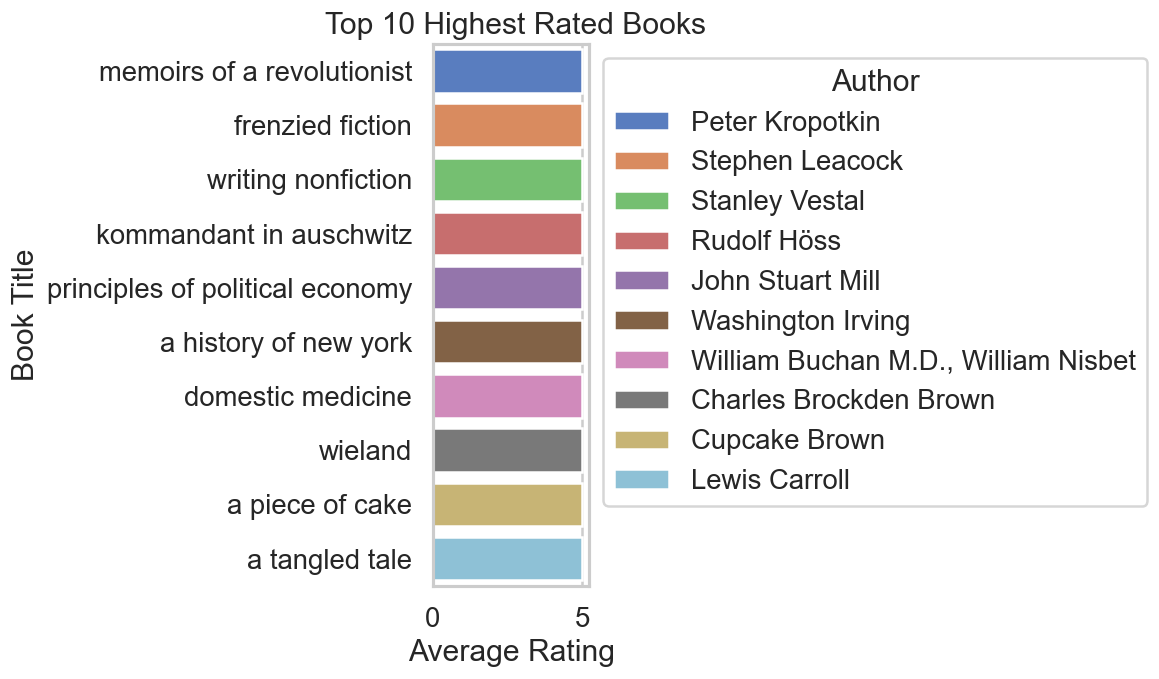

In [63]:
top_rated = (
    df[['title', 'author', 'average_rating']]
    .dropna()
    .sort_values(by='average_rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=top_rated,
    x="average_rating",
    y="title",
    hue="author",
    dodge=False
)
plt.title(" Top 10 Highest Rated Books")
plt.xlabel("Average Rating")
plt.ylabel("Book Title")
plt.legend(title="Author", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("charts/top_rated_books.png", bbox_inches="tight", dpi=300)
plt.show()

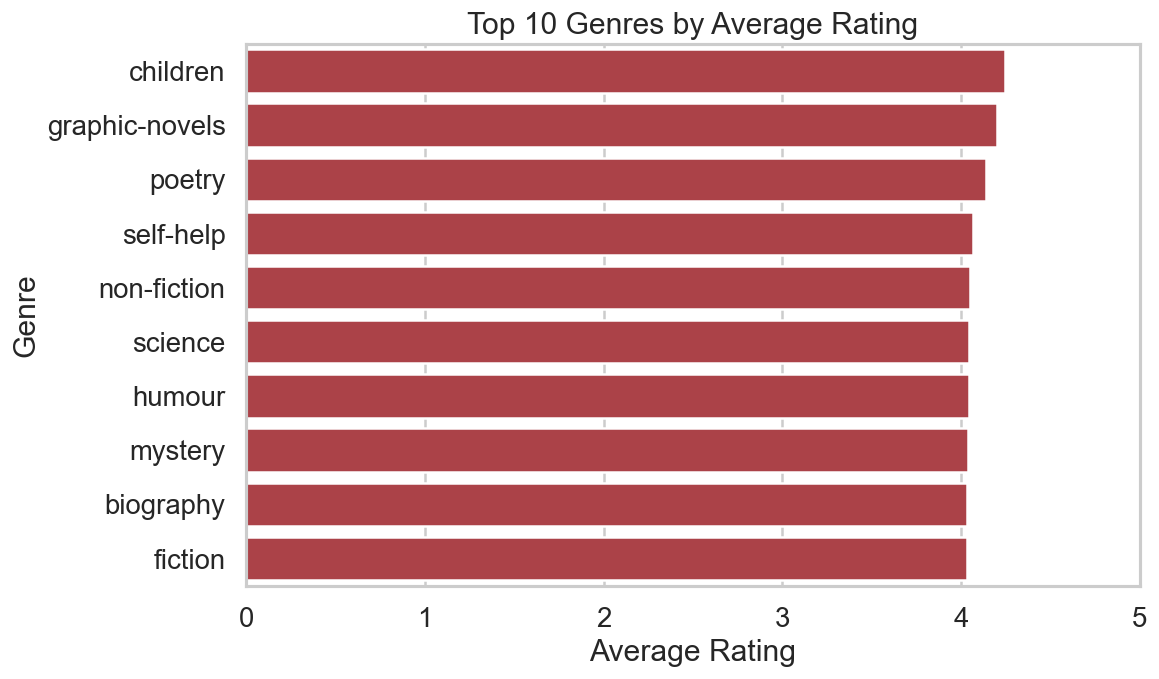

In [62]:
genre_ratings = (
    df.groupby('genre')
    .agg(avg_rating=('average_rating', 'mean'), count=('title', 'count'))
    .query("count >= 5")
    .sort_values('avg_rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=genre_ratings,
    x="avg_rating",
    y=genre_ratings.index,
    color="#bd3039"
)
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Average Rating")
plt.ylabel("Genre")
plt.xlim(0, 5)
plt.tight_layout()
plt.savefig("charts/top_rated_genres.png", bbox_inches="tight", dpi=300)
plt.show()

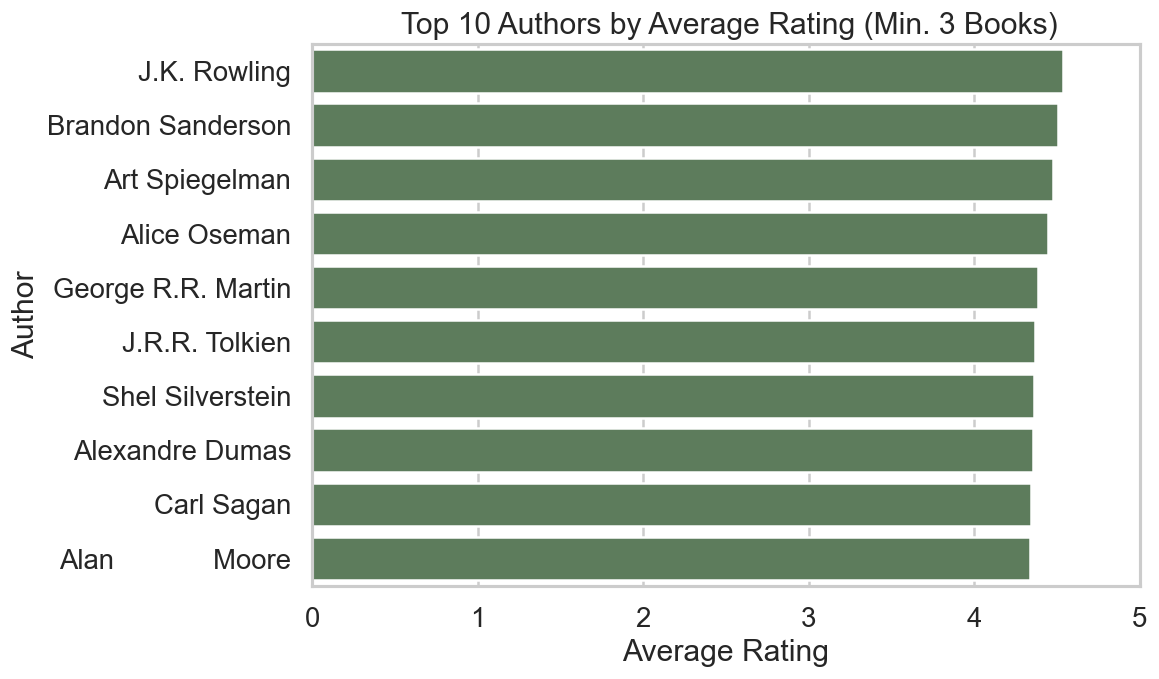

In [61]:
author_ratings = (
    df.groupby('author')
    .agg(avg_rating=('average_rating', 'mean'), count=('title', 'count'))
    .query("count >= 3")
    .sort_values('avg_rating', ascending=False)
    .head(10)
)

plt.figure(figsize=(10, 6))
sns.barplot(
    data=author_ratings,
    x="avg_rating",
    y=author_ratings.index,
    color="#588157"
)
plt.title(" Top 10 Authors by Average Rating (Min. 3 Books)")
plt.xlabel("Average Rating")
plt.ylabel("Author")
plt.xlim(0, 5)
plt.tight_layout()
plt.savefig("charts/top_rated_authors.png", bbox_inches="tight", dpi=300)
plt.show()